Histogram for grayscale image:


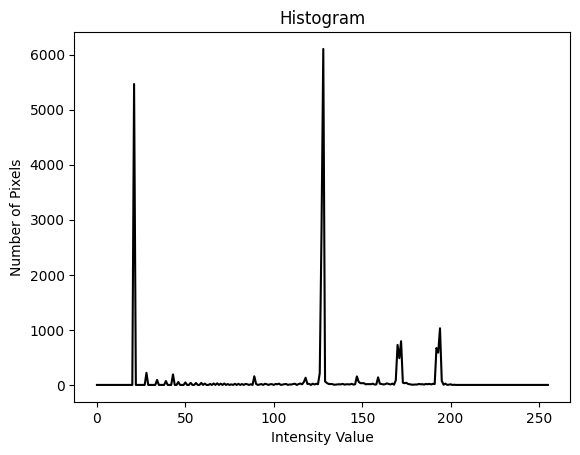

Histogram for color image:


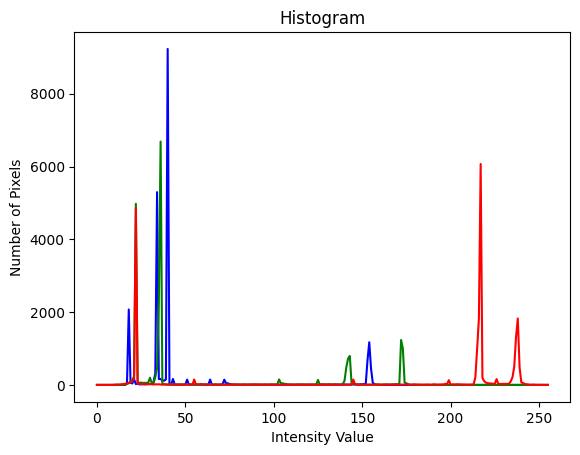

Probability histogram for grayscale image:


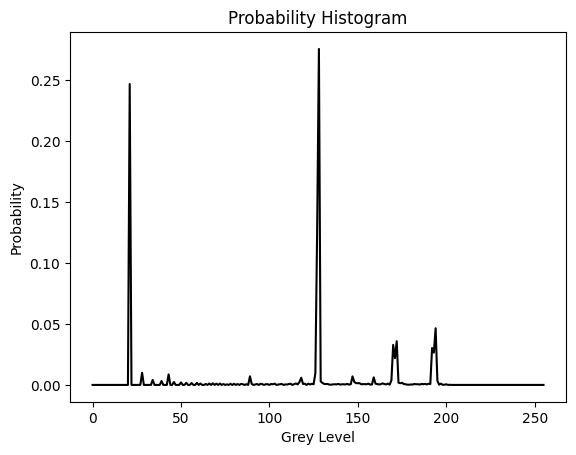

Histogram for bright image:


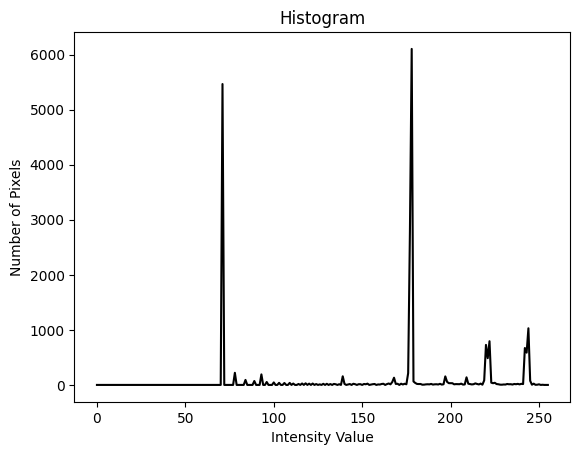

Histogram for dark image:


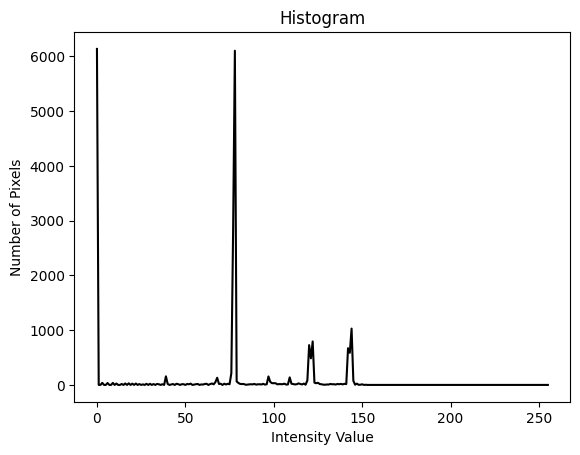

Equalized Image


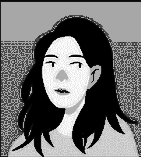

Histogram for equalized image:


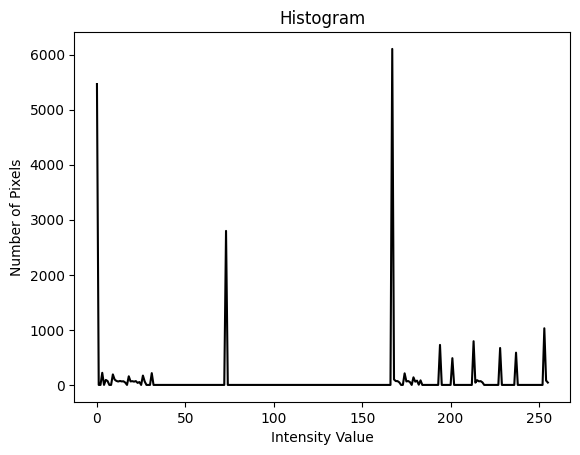

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def compute_histogram(image, color=False):
    if color:
        channels = ('b', 'g', 'r')
        for i, col in enumerate(channels):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    plt.xlabel('Intensity Value')
    plt.ylabel('Number of Pixels')
    plt.title('Histogram')
    plt.show()

def probability_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist /= hist.sum()  # Normalize
    plt.plot(hist, color='black')
    plt.xlabel('Grey Level')
    plt.ylabel('Probability')
    plt.title('Probability Histogram')
    plt.show()

def histogram_equalization(image):
    eq_img = cv2.equalizeHist(image)
    return eq_img

# Load image in both color and grayscale
image_path = '/content/BHAHA.png'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread(image_path)

# Compute and visualize histograms
print("Histogram for grayscale image:")
compute_histogram(gray_image)
print("Histogram for color image:")
compute_histogram(color_image, color=True)

# Probability histograms
print("Probability histogram for grayscale image:")
probability_histogram(gray_image)

# Bright and dark images
bright_image = cv2.add(gray_image, 50)
dark_image = cv2.subtract(gray_image, 50)
print("Histogram for bright image:")
compute_histogram(bright_image)
print("Histogram for dark image:")
compute_histogram(dark_image)

# Histogram equalization
equalized_image = histogram_equalization(gray_image)
print("Equalized Image")
cv2_imshow(equalized_image)

# Compare histograms
print("Histogram for equalized image:")
compute_histogram(equalized_image)


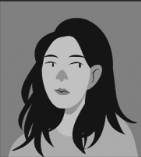

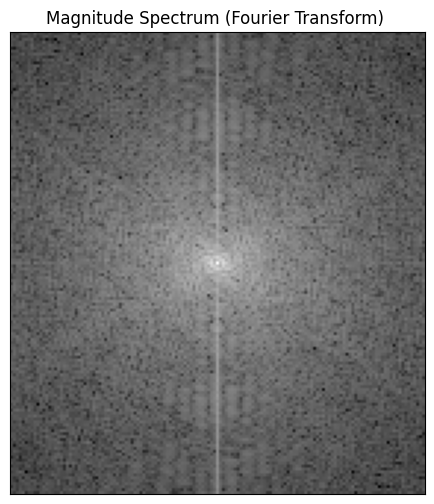

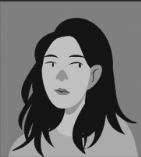

-1

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image in grayscale mode
image_path ="/content/BHAHA.png"
image = cv2.imread(image_path, 0)

# Display the original image using cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)

# Step 1: Compute the 2D Fourier Transform
f_transform = np. fft.fft2(image) # 2D Fourier Transform

# Step 2: Shift the zero frequency component to the center
f_shift = np.fft.fftshift(f_transform)

# Step 3: Compute the magnitude spectrum (log scale for better visualization)
magnitude_spectrum = 20 * np. log(np.abs(f_shift) + 1) # +1 to avoid log(0)

# Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray' )
plt. title('Magnitude Spectrum (Fourier Transform) ')
plt.xticks([]), plt.yticks([])
plt.show()

# Step 4: Inverse Fourier Transform to reconstruct the image
# Inverse shift to move the zero frequency component back to its original position
f_ishift = np.fft.ifftshift(f_shift)

# Inverse Fourier Transform
image_back = np.fft.ifft2(f_ishift)

# Take the absolute value to get the real part of the image
image_back = np.abs(image_back)

# Step 5: Display the reconstructed image (after Inverse Fourier Transform)
cv2_imshow(image_back.astype(np.uint8)) # Convert to uint8 to display
cv2.waitKey(0)

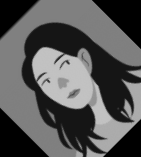

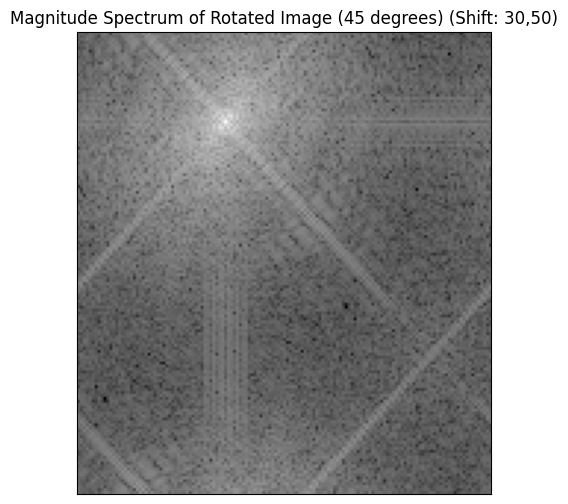

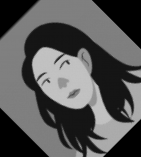

-1

In [ ]:
# Step 3: Rotate the image by 45 degrees (or any angle)
angle = 45
rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), angle, 1), (image.shape[1], image. shape[0] ))

# Display the rotated image
cv2_imshow(rotated_image)
cv2.waitKey(0)

# Step 4: Compute the Fourier Transform of the rotated image
f_transform = np. fft.fft2(rotated_image) # 2D Fourier Transform
f_shift = np.fft.fftshift(f_transform)

x_shift = 30
y_shift = 50
f_shift_custom = np.roll(f_transform, shift=(x_shift, y_shift), axis=(0, 1))

magnitude_spectrum = 20 * np.log(np.abs(f_shift_custom) + 1)  # +1 to avoid log(0)

# Display the magnitude spectrum of the rotated image
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt. title(f'Magnitude Spectrum of Rotated Image ({angle} degrees) (Shift: 30,50)')
plt.xticks([]), plt.yticks ( [])
plt.show()

# Step 5: Inverse Fourier Transform to reconstruct the image
# Inverse shift to move the zero frequency component back to its original position
f_ishift = np.fft.ifftshift(f_shift)

# Inverse Fourier Transform
image_back = np.fft.ifft2(f_ishift)

# Take the absolute value to get the real part of the image
image_back = np.abs(image_back)

# Step 6: Display the reconstructed image (after Inverse Fourier Transform)
cv2_imshow(image_back.astype(np.uint8)) # Convert to uint8 to display
cv2.waitKey(0)